# --- Day 11: Plutonian Pebbles ---
## Part 1


In [2]:
import re
import numpy as np

example_doc = """0 1 10 99 999"""
with open("input.txt", "r") as input:
    doc = input.readlines()[0][:-1]

def load_input(doc):
    stones = [int(f) for f in doc.strip().split(' ')]
    return stones


In [3]:
stones = load_input(example_doc)
stones

[0, 1, 10, 99, 999]

In [4]:
def blink(stone, debug=False) -> list[int]:
    # First rule
    if stone == 0:
        return [1]
    # Second rule
    elif len(str(stone)) % 2 == 0:
        return [int(str(stone)[:len(str(stone))//2]),
                int(str(stone)[len(str(stone))//2:])]
    #Third rule
    else:
        return [stone * 2024]

new_stones = [item for row in [blink(s) for s in stones] for item in row]

print(f"Example one stone line after one blink: {new_stones}")



Example one stone line after one blink: [1, 2024, 1, 0, 9, 9, 2021976]


In [6]:
for stones in [[125, 17], load_input(doc)]:
    new_stones = stones.copy()
    for i in range(25):
        new_stones = [item for row in [blink(s) for s in new_stones] for item in row]
    print(f"Number of stones after 25 blinks: {len(new_stones)}")


Number of stones after 25 blinks: 55312
Number of stones after 25 blinks: 186424


## Part 2 - NOT WORKING

- problem might be everytime we get a 10.
- another approach would be to determine when to simplify the list while keeping the cumulated length

In [ ]:
def count_blink(stone_length, debug=False) -> int:
    # First modified rule
    if stone_length == 0:
        return [1]
    # First rule
    # if stone_length == 1:
    #     return [1]
    # Second rule
    elif stone_length % 2 == 0:
        return [stone_length//2, stone_length//2]
    #Third rule
    else:
    # You can take log10 of each of the numbers being multipled,
    # sum them, floor them, then add one to get the number of digits.
    # I think: floor(log10(digit)) = digit_length
        return [stone_length + 3]

In [ ]:
# stones = load_input(doc)
stones = [125, 17]
# We leave zeros as zeros
# During computation we would get a 0 everytime we get a 10
stones = [len(str(s)) if s != 0 else 0 for s in stones]
print(stones)
new_stones = stones.copy()
new_count_stones = stones.copy()
for i in range(25):
    new_count_stones = [item for row in [count_blink(s) for s in new_count_stones] for item in row]
    new_stones = [item for row in [blink(s) for s in new_stones] for item in row]
    #counts = [counts[i]+count_blink(s)[0] for i, s in enumerate(new_stones)]
    print(new_count_stones)
print(np.sum(new_count_stones))
print(len(new_stones))
print(new_stones)

[3, 2]
[6, 1, 1]
[3, 3, 4, 4]
[6, 6, 2, 2, 2, 2]
[3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]
[6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
24578*2

49156

___

In [36]:
lengths = """14
23
32
44
74
119
150
220
365
545
830
1198
1850
2889
4206
6611
10008
14666
22875
34697
53047
79878
119584
186424
279693
422822
649446
975533
1492502
2262314
3429857"""

lengths = [int(f) for f in lengths.strip().split('\n')]

In [39]:
import scipy

In [47]:
stones

[17]

In [60]:
stones = [125, 17, 17, 127, 2]
# stones = load_input(doc)
sum = 0
for stone in stones:
    new_stones = [stone]
    for i in range(25):
        new_stones = [item for row in [blink(s) for s in new_stones] for item in row]
    print(f"{stone}: {len(new_stones)}")
    sum += len(new_stones)
print(f"Number of stones after 25 blinks: {sum}")


125: 19025
17: 36287
17: 36287
127: 23150
2: 27842
Number of stones after 25 blinks: 142591


In [59]:
23150-19025

4125

In [54]:
for j in range(0,5):
        print(j)

0
1
2
3
4


In [ ]:
def subdivide(stones):
    new_stones = stones.copy()
    sum = 0
    for i in range(5):
        new_stones = [item for row in [blink(s) for s in new_stones] for item in row]
    sum += len(new_stones)
    return sum, new_stones

In [ ]:
stones = [125, 17]
sum = 0
for stone in stones:
    new_stones = [stone]
    subsum = 0
    for j in range(0,5):
        ss, ns = subdivide(new_stones)
        
print(f"Number of stones after 25 blinks: {sum}")


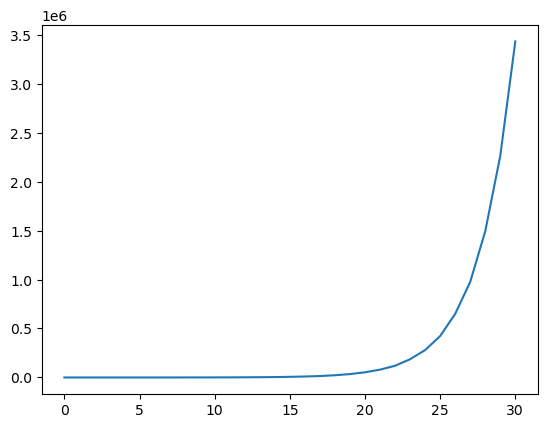

In [41]:
import matplotlib.pyplot as plt

plt.plot(x, y)

In [38]:
x = np.arange(len(lengths))
y = lengths
np.polyfit(np.log(x), y, 1)

C:\Users\vnacher\AppData\Local\Temp\ipykernel_14172\2763081388.py:3: RuntimeWarning: divide by zero encountered in log
  np.polyfit(np.log(x), y, 1)
c:\Users\vnacher\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares